# 1.🧠Business Understanding:

*italicized text*
**🎯 Goal:**

> Add blockquote


Predict which customers are likely to churn (cancel their telecom service) and provide actionable recommendations to reduce churn.

**💼 Why It’s Important:**

Customer retention is critical in the telecom industry.
Accurately identifying at-risk customers allows the company to take proactive measures (personalized offers, loyalty programs, service improvements) — ultimately increasing retention rates, revenue, and customer satisfaction.

Grasping these opportunities can drive significant business growth and competitive advantage.

**👥 Target Audience:**
Telecom General Manager and Business Strategy Team.

**📊 Success Metrics:**

Primary: Achieve a high Recall for churned customers — ensure most at-risk customers are identified.

Secondary: Maintain good F1-score, Accuracy, and ROC-AUC for balanced model performance.

If business data is available, estimate expected revenue gain from improved retention (based on churn probability × customer value).

**💡 Hypotheses:**

Customers with month-to-month contracts are more likely to churn.

Higher monthly charges increase churn likelihood.

Longer tenure (loyal customers) reduces churn probability.

Customers using multiple services (internet + phone) are less likely to churn.


2.**📊 Data Collection & Understanding**

🧾 Key Parameters to Evaluate During Data Collection:
1. Relevance → (Check all the features are covered)
2. Accuracy→ (Compare with trusted source or sample audit)
3. Completeness →
4. Consistency →(Group by differenct type of observation and check
                with industry benchmark)
5. Timeliness →
6. Bias→

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
pip install kaggle

https://www.kaggle.com/datasets/blastchar/telco-customer-churn


In [ ]:
import kagglehub as khub
path=khub.dataset_download("blastchar/telco-customer-churn")
#blastchar is owner name and customer-churn is data set name

Using Colab cache for faster access to the 'telco-customer-churn' dataset.


In [ ]:
import os
print(os.listdir(path))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [ ]:
churn_df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

2.1 Understand each Features:

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**About Features:**
*Customers who left within the last month: the column is called Churn.

*Services that each customer has signed up for-phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

*Customer account information- how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

*Demographic info about customers- gender, age range, and if they have partners and dependents.

2.2 Meta Data and Consistency

In [ ]:
#Data Type
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Consistency:
(churn_df['customerID'].value_counts()==1).sum()

np.int64(7043)

**Observations:**

Total Rows & Columns:
The dataset contains 7,043 rows and 21 columns.

Missing Values:
There are no missing values in the dataset.

Data Types:

MonthlyCharges: Currently stored as float — this is correct.

SeniorCitizen: Stored as int — this is fine, but it can be converted to boolean (True/False) if required

TotalCharges: Stored as string (object) — this should be converted to float for numerical analysis.

Other demographic columns: Many are stored as string; these can be converted to boolean

Consistency:
Since all CustomerID values are unique, the dataset shows good consistency (no duplicate customers).

2.3 Descriptive Analysis — Feature-wise

2.3.1 Churn:

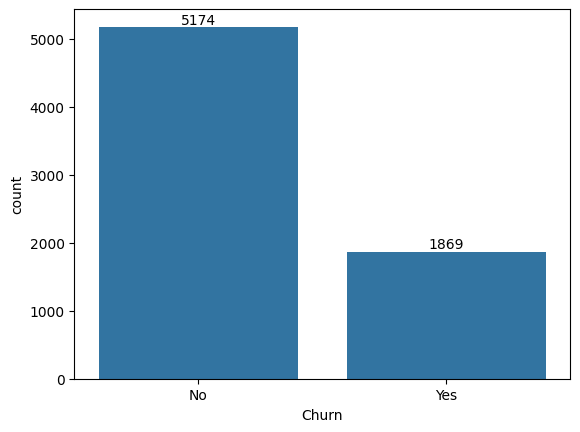

In [ ]:
ax=sns.countplot(x='Churn',data=churn_df)
for container in ax.containers:
  ax.bar_label(container)

In [ ]:
churn_df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Inference:The dataset shows a churn rate of 27%, with 73% of customers not churning.
This indicates a moderate class imbalance.
To avoid the model being biased toward predicting “No churn,” methods like class-weight adjustment (e.g., class_weight="balanced" in Random Forest) are recommended to ensure churners are correctly identified.

2.3.2 MonthlyCharges vs Churn

In [ ]:
churn_df['Churn']=churn_df['Churn'].map({'Yes':1,'No':0})
churn_df['Churn'].head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
churn_df['MonthlyCharges'].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


<Axes: ylabel='MonthlyCharges'>

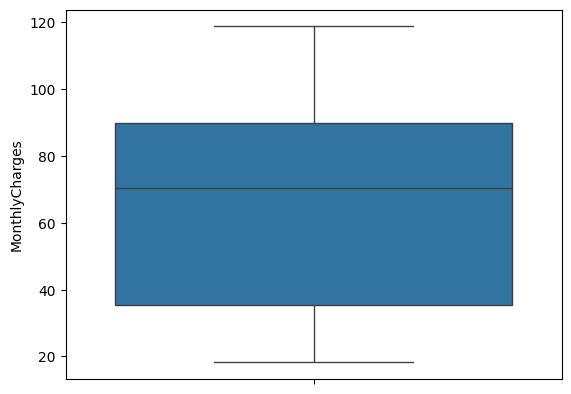

In [ ]:
sns.boxplot(churn_df['MonthlyCharges'])

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

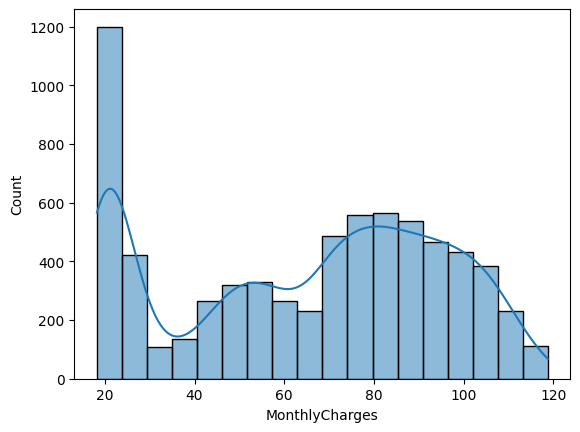

In [ ]:
sns.histplot(churn_df['MonthlyCharges'],kde=True)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

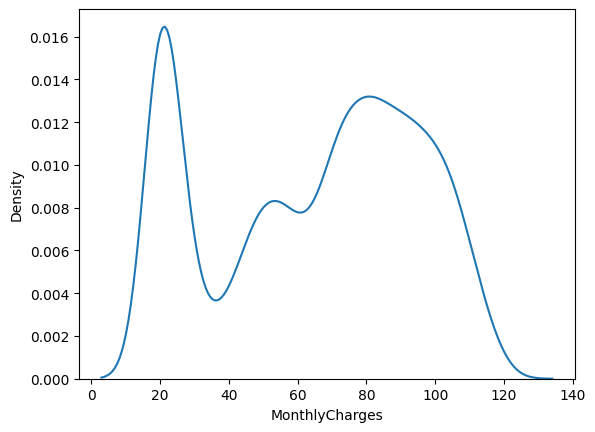

In [ ]:
sns.kdeplot(churn_df['MonthlyCharges'])

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([ 18.25,  18.4 ,  18.55, ..., 118.6 , 118.65, 118.75])),
 (np.float64(28.89306775671488),
  np.float64(64.76169246059918),
  np.float64(0.9598171624851909)))

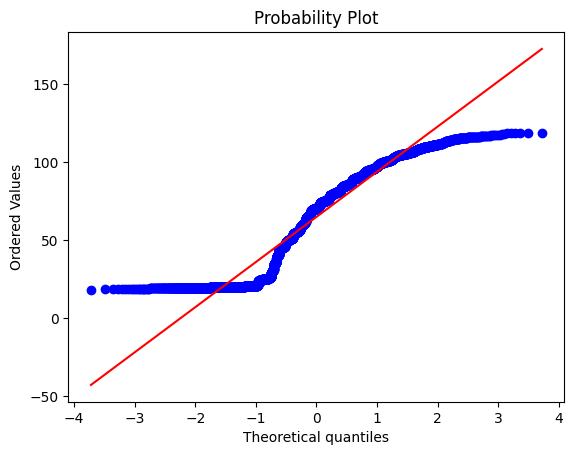

In [ ]:
#QQ Plot
import scipy.stats as stats
stats.probplot(churn_df['MonthlyCharges'],plot=plt)

In [ ]:
#Shapiro–Wilk Test for Normality:
from scipy.stats import shapiro
stat,p_value=shapiro(churn_df['MonthlyCharges'])
print('P Value:',p_value)
if p_value<0.05:
  print('The data is not normally distributed')

P Value: 2.2295643949026396e-51
The data is not normally distributed


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7043.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Pearson Correlation:
churn_df[['MonthlyCharges', 'Churn']].corr()

,MonthlyCharges,Churn
MonthlyCharges,1.000000,0.193356
Churn,0.193356,1.000000


In [ ]:
#Point-Biserial Correlation
from scipy.stats import pointbiserialr
corr=pointbiserialr(churn_df['MonthlyCharges'],churn_df['Churn'])
corr

SignificanceResult(statistic=np.float64(0.19335642223784705), pvalue=np.float64(2.7066456068883436e-60))

<Axes: ylabel='MonthlyCharges'>

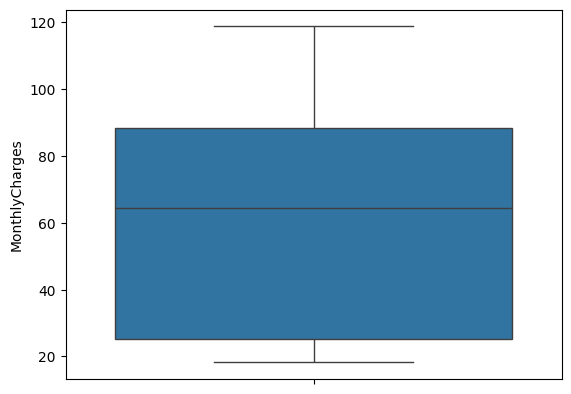

In [ ]:
sns.boxplot(churn_df[churn_df['Churn']==0]['MonthlyCharges'])

<Axes: ylabel='MonthlyCharges'>

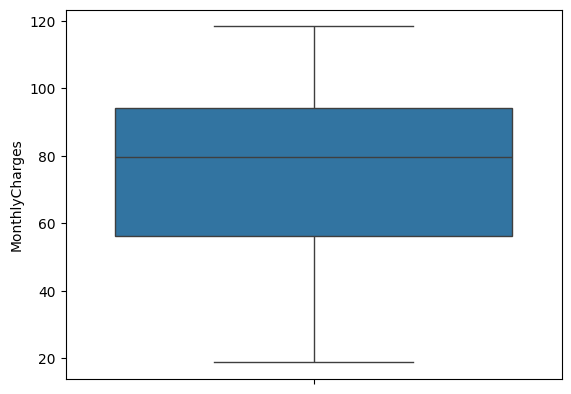

In [ ]:
sns.boxplot(churn_df[churn_df['Churn']==1]['MonthlyCharges'])

In [ ]:
#Independent T-test:
from scipy import stats
monthly_charges_churned = churn_df[churn_df['Churn'] == 1]['MonthlyCharges']
monthly_charges_non_churned = churn_df[churn_df['Churn'] == 0]['MonthlyCharges']
# Perform independent t-test
t_stats, p_value=stats.ttest_ind(monthly_charges_churned, monthly_charges_non_churned)
print(f'T-statistics:{t_stats:.2f}')
print(f'P-Value:{p_value:.2f}')
if p_value<0.05:
  print('There is statistically significant difference in monthly charges between churned and non-churned customers.')
else:
    print('There is no statistically significant difference in monthly charges between churned and non-churned customers.')

T-statistics:16.54
P-Value:0.00
There is statistically significant difference in monthly charges between churned and non-churned customers.


In [ ]:
#Segment the Maonlty charges:
bins=[0,40,70,100,200]
labels=['Low(0-40)','Medium(41-70)','High(71-100)','Very High(200+)']
churn_df['MCharge_Segement']=pd.cut(churn_df['MonthlyCharges'],bins=bins,labels=labels)

In [ ]:
segment_analysis=churn_df.groupby('MCharge_Segement').agg({'Churn':['count','mean']}).reset_index()
segment_analysis

/tmp/ipython-input-1888496308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis=churn_df.groupby('MCharge_Segement').agg({'Churn':['count','mean']}).reset_index()


MCharge_Segement Churn          
                   count      mean
0        Low(0-40)  1838  0.116431
1    Medium(41-70)  1622  0.239211
2     High(71-100)  2681  0.378217
3  Very High(200+)   902  0.280488

***Inference:***
The MonthlyCharges variable shows a modertate but significant positive relationship with churn (r = 0.19, p < 0.001), indicating that customers with higher monthly charges are more likely to churn.
The independent t-test confirms this, showing a statistically significant difference in average monthly charges between churned and non-churned customers (p < 0.001).
This suggests customers may be price-sensitive, and higher billing amounts increase the risk of churn.

Non-normality does NOT affect Random Forest, Gradient Boosting, or Neural
Networks.

Churn rises with MonthlyCharges and peaks in the ₹71–100 range, indicating that customers in this mid-to-high pricing bracket are the most dissatisfied and most likely to leave.
premium users Very High(200+) (e.g., Fiber + added services) who value service quality.

***Recommendation:***
before arriving to recommendation it is import to carry out diagnistic analysis.From a business perspective, the company should evaluate pricing, offer bundles, or provide targeted discounts to high-charge customers.

Focus retention campaigns specifically on customers paying ₹71–100, where churn is highest.Introduce price optimization or flexible plans for mid-range customers.Offer bundle discounts or loyalty rewards.



2.3.3 Tenure vs Churn

In [ ]:
# tenure vs Churn correlation
churn_df[['tenure', 'Churn']].corr()

,tenure,Churn
tenure,1.000000,-0.352229
Churn,-0.352229,1.000000


In [ ]:
churn_df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
#Shapiro–Wilk Test for Normality:
from scipy.stats import shapiro
stat,p_value=shapiro(churn_df['tenure'])
print('P Value:',p_value)
if p_value<0.05:
  print('The data is not normally distributed')

P Value: 7.527283766475277e-55
The data is not normally distributed


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7043.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Segement tenure
bins=[0,9,29,55,72]
label=['Low(0-9)','Medium(10-29)','High(30-55)','Very High(56+)']
churn_df['Tenure_Segement']=pd.cut(churn_df['tenure'],bins=bins,labels=label)

In [ ]:
churn_df.groupby(churn_df['Tenure_Segement']).agg({'Churn':['count','mean']}).reset_index()

/tmp/ipython-input-729753778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby(churn_df['Tenure_Segement']).agg({'Churn':['count','mean']}).reset_index()


Tenure_Segement Churn          
                  count      mean
0        Low(0-9)  1843  0.500814
1   Medium(10-29)  1715  0.283382
2     High(30-55)  1719  0.188482
3  Very High(56+)  1755  0.077493

<Axes: ylabel='tenure'>

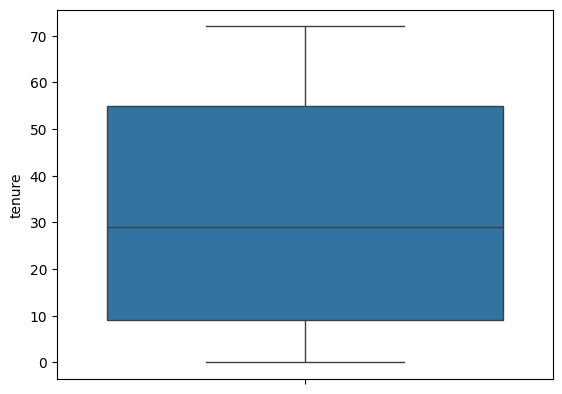

In [ ]:
sns.boxplot(churn_df['tenure'])

<Axes: ylabel='tenure'>

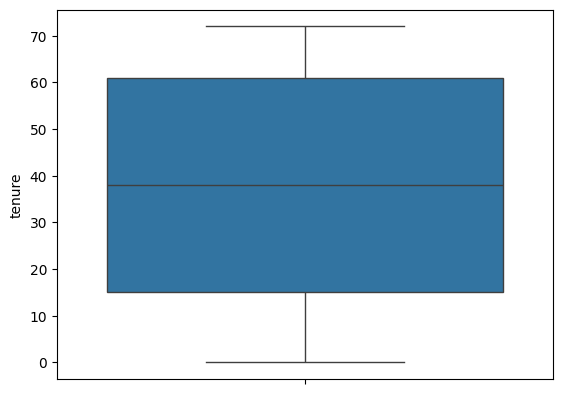

In [ ]:
sns.boxplot(churn_df[churn_df['Churn']==0]['tenure'])

<Axes: ylabel='tenure'>

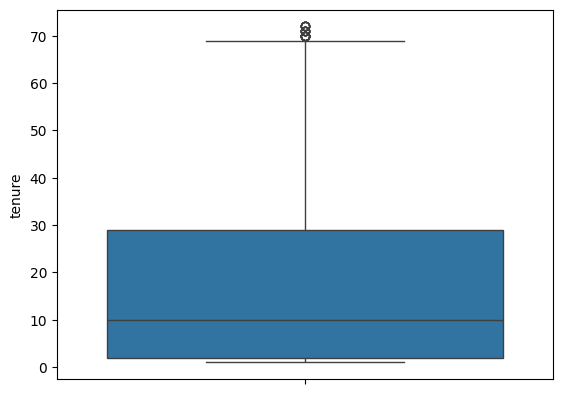

In [ ]:
sns.boxplot(churn_df[churn_df['Churn']==1]['tenure'])

In [ ]:
from scipy import stats
t_stats,P_Value=stats.ttest_ind(monthly_charges_churned, monthly_charges_non_churned)
print(f"T-statistics:{t_stats:.2f}")
print(f"P-Value:{P_Value:.2f}")
if P_Value<0.05:
  print('There is statistically significant difference in monthly charges between churned and non-churned customers.')
else:
 print('There is no statistically significant difference in monthly charges between churned and non-churned customers.')

T-statistics:16.54
P-Value:0.00
There is statistically significant difference in monthly charges between churned and non-churned customers.


***Inference:***
Tenure shows a moderate negative correlation with churn (r = –0.35), indicating that long-term customers are much less likely to churn. The t-test confirms a statistically significant difference in tenure between churned and non-churned customers (p < 0.001), showing that customers who leave tend to have much shorter service durations. Overall, tenure is a strong predictor of churn, emphasizing that new and early-stage customers require more attention and retention effort

Low(0-9) tenure  new customer churn is 50% (Medium(10-29) range churn is 28% and High(20-50) churn is 19% there is no much difference here)

**Recommendation:**
Provide onboarding support, first-3-month discounts, or welcome offers to reduce early churn.
Improve customer experience during the first year, when churn probability is highest.
Encourage longer commitments (1-year or 2-year plans) to reduce churn risk.

2.3.4 Contract vs Churn

In [ ]:
churn_df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [ ]:
churn_by_contract = churn_df.groupby('Contract').agg(total_customers=('Contract', 'count'),churn_count=('Churn', 'sum'),churn_rate=('Churn','mean')).reset_index()
churn_by_contract

,Contract,total_customers,churn_count,churn_rate
0,Month-to-month,3875,1655,0.427097
1,One year,1473,166,0.112695
2,Two year,1695,48,0.028319


In [ ]:
churn_by_contract = churn_df.groupby('Contract').agg({'Churn':['count','mean']}).reset_index()
churn_by_contract

Contract Churn          
                  count      mean
0  Month-to-month  3875  0.427097
1        One year  1473  0.112695
2        Two year  1695  0.028319

In [ ]:
#Percentage Contribution:
A=churn_df['Contract'].value_counts()
B=churn_df['Contract'].count()
percentage=(A/B)*100
print(f'Contract Distribution for Non-Churned Customers:{percentage.round(2)}%')

Contract Distribution for Non-Churned Customers:Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: count, dtype: float64%


<Axes: xlabel='count', ylabel='Contract'>

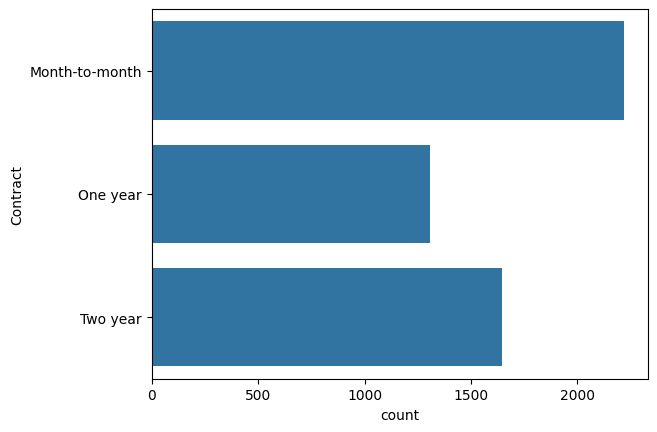

In [ ]:
sns.countplot(churn_df[churn_df['Churn']==0]['Contract'])

In [ ]:
A1=churn_df[churn_df['Churn']==0]['Contract'].value_counts()
B1=churn_df[churn_df['Churn']==0]['Contract'].count()
percentage=(A1/B1)*100
print(f'Contract Distribution for Non-Churned Customers:{percentage.round(2)}%')

Contract Distribution for Non-Churned Customers:Contract
Month-to-month    42.91
Two year          31.83
One year          25.26
Name: count, dtype: float64%


<Axes: xlabel='count', ylabel='Contract'>

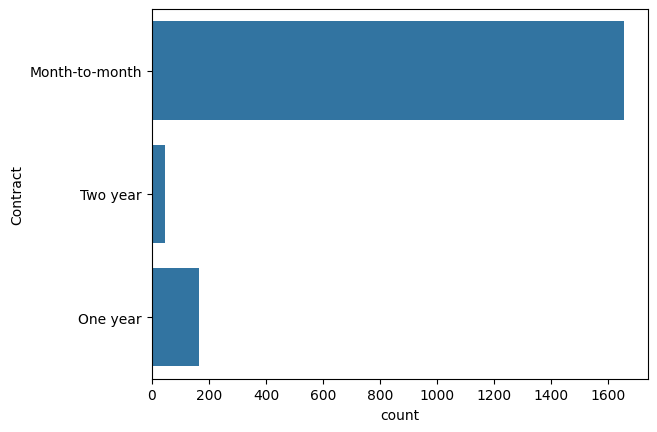

In [ ]:
sns.countplot(churn_df[churn_df['Churn']==1]['Contract'])

In [ ]:
A2=churn_df[churn_df['Churn']==1]['Contract'].value_counts()
B2=churn_df[churn_df['Churn']==1]['Contract'].count()
percentage=(A2/B2)*100
print(f'Contract Distribution for Non-Churned Customers:{percentage.round(2)}%')

Contract Distribution for Non-Churned Customers:Contract
Month-to-month    88.55
One year           8.88
Two year           2.57
Name: count, dtype: float64%


In [ ]:
contingency_table=pd.crosstab(churn_df['Churn'],churn_df['Contract'])
print(contingency_table)

Contract  Month-to-month  One year  Two year
Churn                                       
0                   2220      1307      1647
1                   1655       166        48


In [ ]:
from scipy.stats import chi2_contingency
chi2,P_Value,dof,expected=chi2_contingency(contingency_table)
print(f'chi-squared statistic:{chi2:.2f}')
print(f'P-Value:{P_Value:.2f}')
print(f'dof:{dof}')
print(f'Expected:{expected}')
print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index).round(2))
if p_value < 0.05: # Common significance level
  print("\nThere is a statistically significant association between Contract type and Churn.")
else:
    print("\nThere is no statistically significant association between Contract type and Churn.")


chi-squared statistic:1184.60
P-Value:0.00
dof:2
Expected:[[2846.69175067 1082.11018032 1245.198069  ]
 [1028.30824933  390.88981968  449.801931  ]]
Contract  Month-to-month  One year  Two year
Churn                                       
0                2846.69   1082.11    1245.2
1                1028.31    390.89     449.8

There is a statistically significant association between Contract type and Churn.


In [ ]:
def cramers_v(x, y):
  contingency_table = pd.crosstab(x, y)
  chi2 = chi2_contingency(contingency_table)[0]
  n = contingency_table.sum().sum()
  phi2 = chi2 / n
  r, k = contingency_table.shape
  phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  r_corr = r - ((r-1)**2)/(n-1)
  k_corr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Example usage: Contract vs Churn
cramers_value = cramers_v(churn_df['Contract'], churn_df['Churn'])
print("Cramer's V:", cramers_value)

Cramer's V: 0.40979839182553446


***Inference:***
There is a moderately strong and significant relationship between contract type and churn (Cramer's V = 0.41, p-value = 0.00). Customers on month-to-month contracts are far more likely to churn, contributing to 89% of all churned customers, despite representing only 55% of the total base.
In contrast, customers on one-year and two-year contracts show much lower churn, indicating stronger loyalty and commitment.
**Recommendation:**
This suggests that long-term contract plans are highly effective in reducing churn, and promoting upgrades from month-to-month to longer-term contracts can be a strong retention strategy.

!pip install scorecardpy
import scorecardpy as sc

iv = sc.iv(churn_df, y='Churn')
iv[iv['variable']=='Contract']
IV > 0.3 indicates a strong predictor.

2.3.5  Multiple Services vs Churn

In [ ]:
churn_df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [ ]:
churn_df['PhoneService_C']=churn_df['PhoneService'].map({'Yes':1,'No':0})

In [ ]:
churn_df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [ ]:
churn_df['InternetService_C']=churn_df['InternetService'].map({'Fiber optic':1,'DSL':1,'No':0})

In [ ]:
churn_df['InternetService_C'].value_counts()

,count
InternetService_C,
1,5517
0,1526


In [ ]:
churn_df['StreamingTV_C']=churn_df['StreamingTV'].map({'Yes':1,'No':0,'No internet service':0})

In [ ]:
churn_df['StreamingTV_C'].value_counts()

,count
StreamingTV_C,
0,4336
1,2707


In [ ]:
churn_df['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [ ]:
churn_df['StreamingMovies_C']=churn_df['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':0})

In [ ]:
churn_df['StreamingMovies_C'].value_counts()

,count
StreamingMovies_C,
0,4311
1,2732


In [ ]:
churn_df['Mutiple Services']=np.where((churn_df['PhoneService_C']==1) & (churn_df['InternetService_C']==1) & (churn_df['StreamingTV_C']==1) | (churn_df['StreamingMovies_C']==1),1,0)

In [ ]:
churn_df['Mutiple Services'].value_counts()

,count
Mutiple Services,
0,3629
1,3414


In [ ]:
churn_df[churn_df['Churn']==1]['Mutiple Services'].value_counts()

,count
Mutiple Services,
1,1040
0,829


In [ ]:
churn_df[churn_df['Churn']==0]['Mutiple Services'].value_counts()

,count
Mutiple Services,
0,2800
1,2374


In [ ]:
contingency_table1=pd.crosstab(churn_df['Churn'],churn_df['Mutiple Services'])
print(contingency_table)

Contract  Month-to-month  One year  Two year
Churn                                       
0                   2220      1307      1647
1                   1655       166        48


In [ ]:
from scipy.stats import chi2_contingency
chi2,P_Value,dof,expected=chi2_contingency(contingency_table)
print(f'chi-squared statistic:{chi2:.2f}')
print(f'P-Value:{P_Value:.2f}')
print(f'dof:{dof}')
print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index).round(2))
if P_Value < 0.05: # Common significance level
  print("\nThere is a statistically significant association between Mutiple Services and Churn.")
else:
    print("\nThere is no statistically significant association between  Mutiple Services and Churn.")

chi-squared statistic:1184.60
P-Value:0.00
dof:2
Contract  Month-to-month  One year  Two year
Churn                                       
0                2846.69   1082.11    1245.2
1                1028.31    390.89     449.8

There is a statistically significant association between Mutiple Services and Churn.


In [ ]:
def cramers_v(x, y):
  contingency_table = pd.crosstab(x, y)
  chi2 = chi2_contingency(contingency_table)[0]
  n = contingency_table.sum().sum()
  phi2 = chi2 / n
  r, k = contingency_table.shape
  phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  r_corr = r - ((r-1)**2)/(n-1)
  k_corr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

#0.20 – 0.40	Moderate
#0.40 – 0.60	Relatively Strong
#0.60 – 0.80	Strong
#0.80 – 1.00	Very Strong

# Example usage: Contract vs Churn
cramers_value = cramers_v(churn_df['Mutiple Services'], churn_df['Churn'])
print("Cramer's V:", cramers_value)

Cramer's V: 0.08509370287749908


In [ ]:
!pip install scorecardpy
import scorecardpy as sc

iv = sc.iv(churn_df, y='Churn')
iv[iv['variable']=='Mutiple Services']
#IV > 0.3 indicates a strong predictor.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=57d2fa2d531d5fb87d855f3460d12e3b6e2d7df885de34f86224ba9753fecdf7
  Stored in directory: /root/.cache/pip/wheels/9f/d8/4e/61a6f4e78fe6700f66b699ab38377f0aa5b33e3ef55751ba38
Successfully built scorecardpy


,variable,info_value
9,Mutiple Services,0.038245


**Inference**:Multiple Services” is statistically significant.
 But it is NOT a strong or useful predictor of churn

In [ ]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MCharge_Segement', 'Tenure_Segement', 'PhoneService_C',
       'InternetService_C', 'StreamingTV_C', 'StreamingMovies_C',
       'Mutiple Services'],
      dtype='object')

2.3.6 InternetService vs Churn

In [ ]:
churn_df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [ ]:
churn_df.groupby('InternetService')['Churn'].mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [ ]:
churn_df.groupby('InternetService')['MonthlyCharges'].mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


In [ ]:
def cramers_v(x, y):
  contingency_table = pd.crosstab(x, y)
  chi2 = chi2_contingency(contingency_table)[0]
  n = contingency_table.sum().sum()
  phi2 = chi2 / n
  r, k = contingency_table.shape
  phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  r_corr = r - ((r-1)**2)/(n-1)
  k_corr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Example usage: Contract vs Churn
cramers_value = cramers_v(churn_df['InternetService'], churn_df['MonthlyCharges'])
print("Cramer's V:", cramers_value)

Cramer's V: 0.7824042588638198


In [ ]:
contingency_table2=pd.crosstab(churn_df['Churn'],churn_df['InternetService'])
print(contingency_table2)

InternetService   DSL  Fiber optic    No
Churn                                   
0                1962         1799  1413
1                 459         1297   113


In [ ]:
from scipy.stats import chi2_contingency
chi2,P_Value,dof,expected=chi2_contingency(contingency_table2)
print(f'P-Value:{P_Value:.2f}')
if P_Value < 0.05: # Common significance level
  print("\nThere is a statistically significant association between  InternetService and Churn.")
else:
    print("\nThere is no statistically significant association between  InternetService and Churn.")

P-Value:0.00

There is a statistically significant association between  InternetService and Churn.


In [ ]:
def cramers_v(x, y):
  contingency_table = pd.crosstab(x, y)
  chi2 = chi2_contingency(contingency_table)[0]
  n = contingency_table.sum().sum()
  phi2 = chi2 / n
  r, k = contingency_table.shape
  phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  r_corr = r - ((r-1)**2)/(n-1)
  k_corr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Example usage: Contract vs Churn
cramers_value = cramers_v(churn_df['InternetService'], churn_df['Churn'])
print("Cramer's V:", cramers_value)

Cramer's V: 0.3220367323307425


In [ ]:
iv = sc.iv(churn_df, y='Churn')
iv[iv['variable']=='InternetService']
#IV > 0.3 indicates a strong predictor

,variable,info_value
7,InternetService,0.617953


**Inference**
Customers using Fiber Optic services pay the highest monthly charges and exhibit the highest churn rate (41.9%).

Customers with DSL churn moderately, while those with No Internet almost never churn.

All statistical tests (Point-Biserial, T-test, and Chi-square + Cramer’s V) confirm that the relationship between Internet Service and Churn is strong and statistically significant.

The Information Value (0.618) classifies Internet Service as a very strong predictor, meaning it should be included in the model.

Also monthly charges and Internet Service are strongly correlated

**Recommendation**
Consider targeted retention strategies for Fiber Optic customers.

In [ ]:
#Pipeline:

def analyze_feature(feature):
  churn_df['feature_C']=churn_df[feature].map({'Yes':1,'No':0,'No internet service':0})
      # 1. Churn rate for each category
  churn_rate = churn_df.groupby('feature_C')['Churn'].mean().mul(100).round(2)
  print("\nChurn Rate (%):")
  print(churn_rate)

    # 2. Chi-square test
  table = pd.crosstab(churn_df['feature_C'], churn_df['Churn'])
  from scipy.stats import chi2_contingency
  chi2, p, dof, expected = chi2_contingency(table)
  print(f"\nChi-Square p-value: {p}")

    # 3. Cramer's V
  n = table.sum().sum()
  phi2 = chi2 / n
  r, k = table.shape
  cramers_v = np.sqrt(phi2 / min(r-1, k-1))
  print(f"Cramer's V: {cramers_v}")

2.3.7 MultipleLines vs Churn

In [ ]:

churn_df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [ ]:
analyze_feature('MultipleLines')


Churn Rate (%):
feature_C
0.0    25.04
1.0    28.61
Name: Churn, dtype: float64

Chi-Square p-value: 0.0014809944089070278
Cramer's V: 0.03985138386420065


Inference:Though MultipleLines relationship is significant with preditor it is not strong ,so MultipleLines won't be considered as predictor

2.3.7 'StreamingTV' vs Churn

In [ ]:
churn_df['StreamingTV'].value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [ ]:
analyze_feature('StreamingTV')


Churn Rate (%):
feature_C
0    24.33
1    30.07
Name: Churn, dtype: float64

Chi-Square p-value: 1.3024835736732686e-07
Cramer's V: 0.06289720836973728


Inference:Though StreamingTV relationship is significant with preditor it is not strong so StreamingTV won't be considered as predictor

2.3.8 'StreamingMovies' vs *Churn*

In [ ]:
churn_df['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [ ]:
analyze_feature('StreamingMovies')


Churn Rate (%):
feature_C
0    24.38
1    29.94
Name: Churn, dtype: float64

Chi-Square p-value: 2.9974738476267514e-07
Cramer's V: 0.06105157344570017


Inference:Though StreamingMovies relationship is significant with preditor it is not strong so StreamingTV won't be considered as predictor

2.3.9 'TotalCharges' vs Churn

In [ ]:
churn_df['TotalCharges']=pd.to_numeric(churn_df['TotalCharges'],errors='coerce')

In [ ]:
churn_df[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.651065
MonthlyCharges,0.651065,1.000000


**Inference**:Since Total Charge is the sum of tenure and Montly charge we can ignore this (Correlation is 65%)

2.3.8 'Demographic Features' vs Churn

In [ ]:
#Gender
churn_df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [ ]:
churn_df['gender_C']=churn_df['gender'].map({'Male':0,'Female':1})

In [ ]:
churn_df.groupby('gender')['Churn'].mean().mul(100).round(2)

,Churn
gender,
Female,26.92
Male,26.16


In [ ]:
churn_df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [ ]:
churn_df.groupby('SeniorCitizen')['Churn'].mean().mul(100).round(2)

,Churn
SeniorCitizen,
0,23.61
1,41.68


In [ ]:
churn_df['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [ ]:
churn_df.groupby('Partner')['Churn'].mean().mul(100).round(2)

,Churn
Partner,
No,32.96
Yes,19.66


In [ ]:
churn_df['Partner_C']=churn_df['Partner'].map({'Yes':1,'No':0})

In [ ]:
churn_df['Partner_C'].value_counts()

,count
Partner_C,
0,3641
1,3402


In [ ]:
churn_df['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2110


In [ ]:
churn_df['Dependents_C']=churn_df['Dependents'].map({'Yes':1,'No':0})

In [ ]:
churn_df.groupby('Dependents')['Churn'].mean().mul(100).round(2)

,Churn
Dependents,
No,31.28
Yes,15.45


In [ ]:
churn_df[['gender_C','SeniorCitizen','Partner_C','Dependents_C','Churn']].corr()

,gender_C,SeniorCitizen,Partner_C,Dependents_C,Churn
gender_C,1.000000,0.001874,0.001808,-0.010517,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.150889
Partner_C,0.001808,0.016479,1.000000,0.452676,-0.150448
Dependents_C,-0.010517,-0.211185,0.452676,1.000000,-0.164221
Churn,0.008612,0.150889,-0.150448,-0.164221,1.000000


In [ ]:

contingency_table3=pd.crosstab(churn_df['gender_C'],churn_df['Churn'])
from scipy.stats import chi2_contingency
chi2,p_value,dof,expected=chi2_contingency(contingency_table3)
print('P_Value:',p_value)
if p_value<0.05:
  print('There is statistically significant association between gender and Churn.')
else:
  print('No statistically significant association between gender and Chrun')


P_Value: 0.48657873605618596
No statistically significant association between gender and Chrun


In [ ]:
  #Senior Citizen
  churn_rate = churn_df.groupby('SeniorCitizen')['Churn'].mean().mul(100).round(2)
  print("\nChurn Rate (%):")
  print(churn_rate)

    # 2. Chi-square test
  table = pd.crosstab(churn_df['SeniorCitizen'], churn_df['Churn'])
  from scipy.stats import chi2_contingency
  chi2, p, dof, expected = chi2_contingency(table)
  print(f"\nChi-Square p-value: {p}")

    # 3. Cramer's V
  n = table.sum().sum()
  phi2 = chi2 / n
  r, k = table.shape
  cramers_v = np.sqrt(phi2 / min(r-1, k-1))
  print(f"Cramer's V: {cramers_v}")


Churn Rate (%):
SeniorCitizen
0    23.61
1    41.68
Name: Churn, dtype: float64

Chi-Square p-value: 1.510066805092378e-36
Cramer's V: 0.15045309974200427


In [ ]:
#Partner
analyze_feature('Partner')


Churn Rate (%):
feature_C
0    32.96
1    19.66
Name: Churn, dtype: float64

Chi-Square p-value: 2.1399113440759935e-36
Cramer's V: 0.15012578474988478


In [ ]:
#Dependents
analyze_feature('Dependents')


Churn Rate (%):
feature_C
0    31.28
1    15.45
Name: Churn, dtype: float64

Chi-Square p-value: 4.9249216612154196e-43
Cramer's V: 0.1638703967886369



***Inference:***
1.Gender:Not a significant predictor
2.SeniorCitizen:strong churn risk may be beacuse of Tech issues, high cost
 Recom:Senior-friendly plans, better support
3.Partner-strong churn reducer,may be customer without partner are Less household stability
 Recom:Bundles, low-cost offers for the customer without partner
4.Dependents-strong churn reducer
 Recom:Offer entertainment bundles and Personalized “stay benefits”


2.3.9 'OnlineSecurity' vs Churn

In [ ]:
analyze_feature('OnlineSecurity')


Churn Rate (%):
feature_C
0    31.33
1    14.61
Name: Churn, dtype: float64

Chi-Square p-value: 1.2320984831180024e-46
Cramer's V: 0.17087072870851697


**Inference:**The relationship is statistically significant and shows a moderate strength of association.
**Recommendation**:
Prioritize customers without Online Security for retention campaigns.

Offer discounted Online Security add-ons, bundled security plans, or free trial periods.

Educate customers on the value of online protection and how it improves service experience.

2.3.10 'OnlineBackup' vs Churn

In [ ]:
churn_df['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [ ]:
analyze_feature('OnlineBackup')


Churn Rate (%):
feature_C
0    29.17
1    21.53
Name: Churn, dtype: float64

Chi-Square p-value: 6.214092807254819e-12
Cramer's V: 0.08191660377198152


**Inference:**
Customers without Online Backup show higher churn (29.17% vs 21.53%).
The relationship is statistically significant but weak.
OnlineBackup should still be included as a predictor because it adds small but meaningful signal to the churn mode

**Recomentation:**
Promote Online Backup as an add-on to customers who don’t use it.

Offer free trials, discounted bundles, or value packs combining backup + security.

Communicate benefits like data safety, automatic backups, and peace of mind.

2.3.11 'DeviceProtection' vs Churn

In [ ]:
churn_df['DeviceProtection'].value_counts()


,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [ ]:
analyze_feature('DeviceProtection')


Churn Rate (%):
feature_C
0    28.65
1    22.50
Name: Churn, dtype: float64

Chi-Square p-value: 3.315693222362861e-08
Cramer's V: 0.06582129431756738


**Inference:**DeviceProtection CAN be included as a predictor in your churn model,
but it is a weak predictor compared to features like Contract type, InternetService, or Tenure.

It is statistically significant, but not strongly influential on churn
**Recommentaion:**
Promote DeviceProtection plans more actively (discounts, bundle offers).

Include DeviceProtection as part of a loyalty package for at-risk customers.

In [ ]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MCharge_Segement', 'Tenure_Segement', 'PhoneService_C',
       'InternetService_C', 'StreamingTV_C', 'StreamingMovies_C',
       'Mutiple Services', 'feature_C', 'gender_C', 'Partner_C',
       'Dependents_C'],
      dtype='object')

2.3.12 'TechSupport' vs Churn

In [ ]:
churn_df['TechSupport'].value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [ ]:
analyze_feature('TechSupport')


Churn Rate (%):
feature_C
0    31.19
1    15.17
Name: Churn, dtype: float64

Chi-Square p-value: 2.9235674453140758e-43
Cramer's V: 0.1643192912540774


**Inference:**Tech Support shows a strong and statistically significant relationship with churn. Customers without Tech Support churn at a much higher rate (31%) compared to those who have it (15%). With a very low p-value and moderate association strength (Cramer's V = 0.164), Tech Support should be included as an important predictor in the churn model.
**Recommendation:**Business teams should promote Tech Support add-ons, bundle it with high-risk plans, and proactively target customers who currently do not have Tech Support, as this can significantly reduce future churn.

2.3.12 'PaperlessBilling' vs Churn

In [ ]:
churn_df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


In [ ]:
analyze_feature('PaperlessBilling')


Churn Rate (%):
feature_C
0    16.33
1    33.57
Name: Churn, dtype: float64

Chi-Square p-value: 4.073354668665985e-58
Cramer's V: 0.19149814355338285


**Inference**:PaperlessBilling should be included as a predictor of churn.
since it is significant predictor and has Moderate relationship

Paperless customers have significantly higher churn, likely due to:

Less human touch in communication

More digital-only engagement leading to lower perceived value or missed reminders

**Recomendation:**

Provide personalized digital reminders (payment alerts, usage summaries).

Offer loyalty perks or discounts for paperless customers.

Improve digital communication clarity—simpler bills, notifications about plan value.

Consider a welcome onboarding email series for paperless customers to increase trust.

2.3.13 'PaymentMethod' vs Churn

In [ ]:
churn_df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [ ]:
churn_df['PaymentMethod'].value_counts()

# Manual analysis for 'PaymentMethod' since it's not a simple Yes/No/No internet service feature

# 1. Churn rate for each category
churn_rate = churn_df.groupby('PaymentMethod')['Churn'].mean().mul(100).round(2)
print("\nChurn Rate (%):")
print(churn_rate)

# 2. Chi-square test
table = pd.crosstab(churn_df['PaymentMethod'], churn_df['Churn'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
print(f"\nChi-Square p-value: {p}")

# Redefine cramers_v function to ensure it's available
def cramers_v(x, y):
  contingency_table = pd.crosstab(x, y)
  chi2 = chi2_contingency(contingency_table)[0]
  n = contingency_table.sum().sum()
  phi2 = chi2 / n
  r, k = contingency_table.shape
  phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  r_corr = r - ((r-1)**2)/(n-1)
  k_corr = k - ((k-1)**2)/(n-1)
  # Handle cases where min((k_corr-1), (r_corr-1)) might be zero or negative
  denominator = min((k_corr-1), (r_corr-1))
  if denominator <= 0:
      return 0.0 # Return 0 or handle as appropriate for no variance
  return np.sqrt(phi2_corr / denominator)

# 3. Cramer's V (using the previously defined cramers_v function)
cramers_value = cramers_v(churn_df['PaymentMethod'], churn_df['Churn'])
print(f"Cramer's V: {cramers_value}")


Churn Rate (%):
PaymentMethod
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Electronic check             45.29
Mailed check                 19.11
Name: Churn, dtype: float64

Chi-Square p-value: 3.6823546520097993e-140
Cramer's V: 0.3026771381187204


**Inference**:PaymentMethod is a sigificant and has strong realtionship with Churn

**Recomendation:**

Promote auto-payment options (bank transfer / credit card) with discounts or loyalty rewards.

Target Electronic Check users with personalized campaigns encouraging switching to automatic payment.

Improve communication about billing options to reduce friction and confusion.

2.3.13 'PhoneService' vs Churn

In [ ]:
churn_df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [ ]:
analyze_feature('PhoneService')


Churn Rate (%):
feature_C
0    24.93
1    26.71
Name: Churn, dtype: float64

Chi-Square p-value: 0.3387825358066928
Cramer's V: 0.011398285522718045


Inference:PhoneService is not a siginificant predictor of Churn

**Finalised Independent Variables:**
* Strong:*
Contract
Tenure
InternetService
PaymentMethod
*Moderate:*
MonthlyCharges
PaperlessBilling
OnlineSecurity
TechSupport
Dependents
Partner
SeniorCitizen

3.**📊 Data Preparation & Feature Engineering**

In [ ]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MCharge_Segement', 'Tenure_Segement', 'PhoneService_C',
       'InternetService_C', 'StreamingTV_C', 'StreamingMovies_C',
       'Mutiple Services', 'feature_C', 'gender_C', 'Partner_C',
       'Dependents_C'],
      dtype='object')

In [ ]:
#Convert Categorical Variable to Dummy:
churn_df_A=pd.get_dummies(churn_df[['Contract','InternetService','PaymentMethod']],drop_first=True)

In [ ]:
churn_df_A=pd.concat([churn_df_A,churn_df[['tenure','MonthlyCharges','PaperlessBilling','OnlineSecurity','TechSupport','Dependents','Partner','SeniorCitizen','Churn']]],axis=1)

In [ ]:
# Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

object_cols_to_encode = ['PaperlessBilling', 'OnlineSecurity', 'TechSupport', 'Dependents', 'Partner']


for col in object_cols_to_encode:
    if col in churn_df_A.columns and churn_df_A[col].dtype == 'object':
        mapping = {'Yes': 1, 'No': 0}
        if 'No internet service' in churn_df_A[col].unique():
            mapping['No internet service'] = 0
        churn_df_A[col] = churn_df_A[col].map(mapping).astype(int)


for col in churn_df_A.columns:
    if churn_df_A[col].dtype == bool:
        churn_df_A[col] = churn_df_A[col].astype(int)

X = churn_df_A[['Contract_One year', 'Contract_Two year',
              'InternetService_Fiber optic', 'InternetService_No',
              'PaymentMethod_Credit card (automatic)',
              'PaymentMethod_Electronic check',
              'PaymentMethod_Mailed check',
              'tenure', 'MonthlyCharges', 'PaperlessBilling',
              'OnlineSecurity', 'TechSupport', 'Dependents',
              'Partner', 'SeniorCitizen']]
vif_values=[]
features=X.columns

for i in range(len(features)):
  vif=variance_inflation_factor(X.values,i)
  vif_values.append(vif)
vif_df = pd.DataFrame({
    "Feature": features,
    "VIF": vif_values
})
print(vif_df)

                                  Feature        VIF
0                       Contract_One year   2.025474
1                       Contract_Two year   3.387284
2             InternetService_Fiber optic   6.324637
3                      InternetService_No   2.286685
4   PaymentMethod_Credit card (automatic)   1.854444
5          PaymentMethod_Electronic check   2.625926
6              PaymentMethod_Mailed check   2.071778
7                                  tenure   6.986084
8                          MonthlyCharges  21.252040
9                        PaperlessBilling   2.865016
10                         OnlineSecurity   2.058122
11                            TechSupport   2.226161
12                             Dependents   1.960986
13                                Partner   2.824286
14                          SeniorCitizen   1.366085


Though MonthlyCharges VIF is higher this is important predictor of Chrun so we cannot ignore also Tree models can handle the Multicollinearity better

4.**📊 Modeling & Evaluation

4.1 K means Clustering

In [ ]:
from sklearn.cluster import k_means
from sklearn.preprocessing import StandardScaler

In [ ]:
df_Cluster=churn_df_A[['tenure','MonthlyCharges','PaperlessBilling','OnlineSecurity','TechSupport','TechSupport','Dependents','Partner','SeniorCitizen']]

In [ ]:
#Scale numeric features
scaler=StandardScaler()
df_Clu_Scal=scaler.fit_transform(df_Cluster)

In [ ]:
#Choose number of clusters using Elbow method
from sklearn.cluster import KMeans

WCSS=[]
for i in range(2,10):
  km_model = KMeans(n_clusters=i,random_state=42, n_init=10)
  km_model.fit(df_Clu_Scal)
  WCSS.append(km_model.inertia_) #WCSS-within Cluster Sum of Square

In [ ]:
WCSS

[46701.72798603078,
 40093.91925480725,
 34721.78035029786,
 31613.709079008815,
 28851.944206306376,
 26723.61522334948,
 24978.772655746365,
 23468.45914669688]

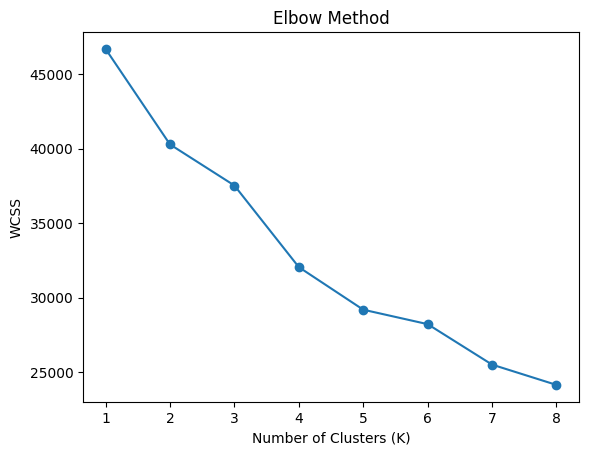

In [ ]:
import matplotlib.pyplot as plt

wcss = [46701.72, 40288.43, 37528.98, 32047.31, 29188.29,
        28217.10, 25499.64, 24136.09]

K = range(1, len(wcss) + 1)

plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Best Choice: K = 4 clusters

In [ ]:
#K Mean Clustering:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4,random_state=42, n_init=10)
kmeans_model.fit_predict(df_Clu_Scal)
churn_df_A['Cluster']=kmeans_model.labels_

In [ ]:
# Compute cluster profile
cluster_profile=churn_df_A.groupby('Cluster').agg(SampleSize=('Cluster','count'),tenure=('tenure','mean'),MonthlyCharges=('MonthlyCharges','mean'),hurn = ('Churn', 'mean'),
    OnlineSecurity = ('OnlineSecurity', 'mean'),
    TechSupport = ('TechSupport', 'mean'),
    SeniorCitizen = ('SeniorCitizen', 'mean'))
cluster_profile

,SampleSize,tenure,MonthlyCharges,hurn,OnlineSecurity,TechSupport,SeniorCitizen
Cluster,,,,,,,
0,883,28.344281,76.788788,0.484711,0.177803,0.006795,1.000000
1,2038,44.929833,80.722988,0.150147,0.539254,1.000000,0.124632
2,2412,17.516169,55.123072,0.358624,0.139303,0.000000,0.000000
3,1710,40.436257,53.123860,0.157895,0.249708,0.000000,0.002924


**Recomendation from Cluster:**
| Cluster | Churn Level       | Key Risks                                          | What to Do                                                 |
| ------- | ----------------- | -------------------------------------------------- | ---------------------------------------------------------- |
| **0**   | **VERY HIGH**     | Senior citizens + high bills + no support/security | Discounts, senior-friendly services, priority tech support |
| **2**   | **MODERATE-HIGH** | Low tenure + no support/security                   | Early retention efforts + free trials + onboarding offers  |


4.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X = churn_df_A[['Contract_One year', 'Contract_Two year',
              'InternetService_Fiber optic', 'InternetService_No',
              'PaymentMethod_Credit card (automatic)',
              'PaymentMethod_Electronic check',
              'PaymentMethod_Mailed check',
              'tenure', 'MonthlyCharges', 'PaperlessBilling',
              'OnlineSecurity', 'TechSupport', 'Dependents',
              'Partner', 'SeniorCitizen']]
y=churn_df_A['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rf=RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=300)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [ ]:
y_predict=rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:,1]

In [ ]:
y_pred_proba

array([0.69666667, 0.08      , 0.02      , ..., 0.01333333, 0.00333333,
       0.40666667])

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
F1_Score = f1_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_pred_proba)
Recall = recall_score(y_test, y_predict)
Precision = precision_score(y_test, y_predict)

In [ ]:
print("📌 Random Forest Results")
print("---------------------------")
print("Accuracy :", round(accuracy, 4))
print("F1-Score :", round(F1_Score, 4))
print("ROC-AUC  :", round(roc_auc, 4))
print("Precision:", round(Precision, 4))
print("Recall   :", round(Recall, 4))   # ⭐ VERY IMPORTANT FOR CHURN
print("\nClassification Report:\n")
print(confusion_matrix(y_test,y_predict))

📌 Random Forest Results
---------------------------
Accuracy : 0.7928
F1-Score : 0.5409
ROC-AUC  : 0.8209
Precision: 0.654
Recall   : 0.4611

Classification Report:

[[945  91]
 [201 172]]


In [ ]:
#To OverFitting Recall for Train DataSet
y_predictLT=rf.predict(X_train)
RecallLT=recall_score(y_train,y_predictLT)
print("Recall   :", round(RecallLT, 4))

Recall   : 0.9973


Since the Recall difference is 50% there is overfitting here

In [ ]:
#Feature Importance
pd.DataFrame(rf.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values('Importance',ascending=False)

,Importance
MonthlyCharges,0.308175
tenure,0.282144
Contract_Two year,0.075156
InternetService_Fiber optic,0.050171
PaymentMethod_Electronic check,0.039583
Contract_One year,0.037969
OnlineSecurity,0.029635
PaperlessBilling,0.029186
TechSupport,0.026175
Partner,0.025168


4.3 XG Boost Regression

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model=xgb.XGBClassifier(random_state=42,class_weight='balanced')

In [ ]:
#y_predict_XG = (y_pred_proba >= 0.30).astype(int)

In [ ]:
#Hyperparameter Grid
param_grid={
     'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],    # L1 regularization
    'reg_lambda': [1, 2, 5]
}
grid_search=GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

In [ ]:
xgb_model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:19:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

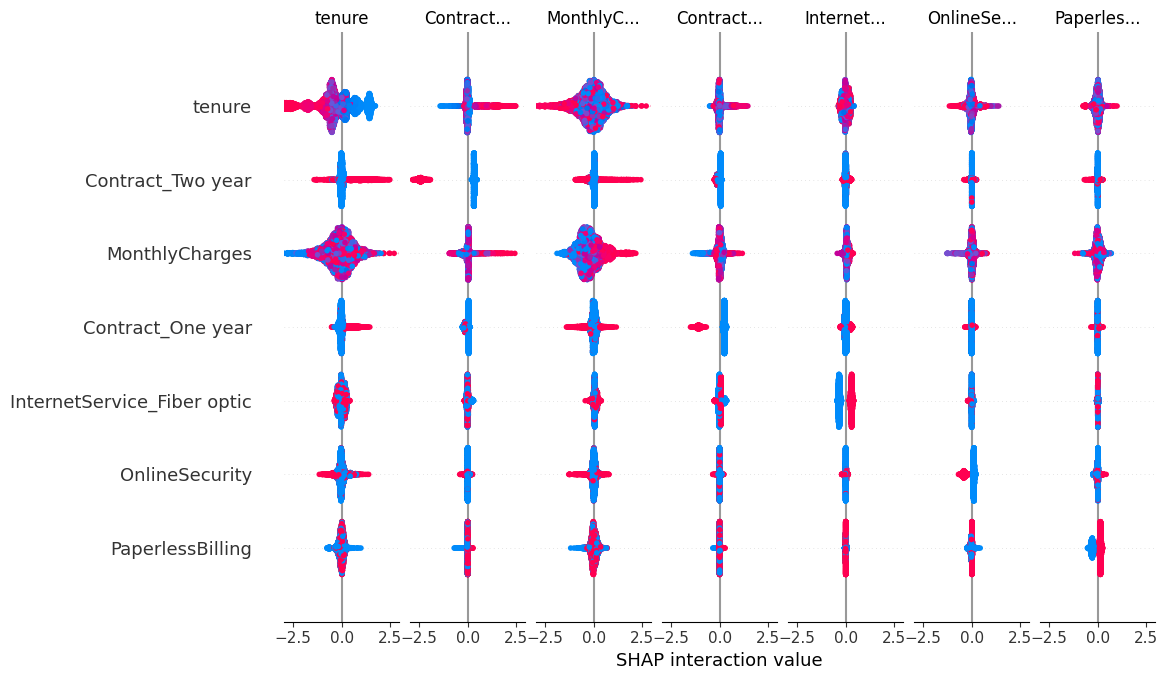

In [ ]:
#(SHapley Additive exPlanations) shap to find out interactive features
import shap

explainer = shap.TreeExplainer(xgb_model)     # XGBoost or RF model
shap_values = explainer.shap_values(X)
interaction_values = explainer.shap_interaction_values(X)

shap.summary_plot(interaction_values, X)

In [ ]:
y_predictXG=xgb_model.predict(X_test)
y_predXG_prob=xgb_model.predict_proba(X_test)[:,1]

In [ ]:
accuracyXG=accuracy_score(y_test,y_predictXG)
F1_ScoreXG=f1_score(y_test,y_predictXG)
roc_aucXG=roc_auc_score(y_test,y_predictXG)
RecallXG=recall_score(y_test,y_predictXG)
PrecisionXG=precision_score(y_test,y_predictXG)

In [ ]:
print("📌 XG Boost")
print("---------------------------")
print("Accuracy :",round(accuracyXG,4))
print("F1-Score :", round(F1_ScoreXG, 4))
print("ROC-AUC  :", round(roc_aucXG, 4))
print("Precision:", round(PrecisionXG, 4))
print("Recall   :", round(RecallXG, 4))
print("\nClassification Report:\n")
print(confusion_matrix(y_test,y_predict))

📌 XG Boost
---------------------------
Accuracy : 0.7871
F1-Score : 0.5614
ROC-AUC  : 0.6999
Precision: 0.6174
Recall   : 0.5147

Classification Report:

[[945  91]
 [201 172]]


In [ ]:
#To OverFitting Recall for Train DataSet
y_predictXGT=xgb_model.predict(X_train)
RecallXGT=recall_score(y_train,y_predictXGT)
print("Recall   :", round(RecallXGT, 4))

Recall   : 0.7848


Since the Recall difference is 30% there is overfitting here

In [ ]:
#Feature Importance
pd.DataFrame(xgb_model.feature_importances_,columns=['Importance'],index=X_train.columns).sort_values('Importance',ascending=False)

,Importance
InternetService_Fiber optic,0.398378
Contract_Two year,0.238292
Contract_One year,0.111853
InternetService_No,0.082293
tenure,0.024285
PaymentMethod_Electronic check,0.017927
OnlineSecurity,0.016603
SeniorCitizen,0.015952
TechSupport,0.015115
MonthlyCharges,0.014431


Note:Contract tyre(One Year and Two Year)  and InternetService(Fiber optic & No) are the importance predictor

4.4 Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
log_model=Pipeline([('scaler', StandardScaler()),('model', LogisticRegression(class_weight='balanced',penalty='l2'))])

In [ ]:
log_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(class_weight='balanced'))])

In [ ]:
y_predictL=log_model.predict(X_test)
y_predL_prob=log_model.predict_proba(X_test)

In [ ]:
accuracyL=accuracy_score(y_test,y_predictL)
F1_ScoreL=f1_score(y_test,y_predictL)
roc_aucL=roc_auc_score(y_test,y_predictL)
RecallL=recall_score(y_test,y_predictL)
PrecisionL=precision_score(y_test,y_predictL)

In [ ]:
print("📌 Logistc Regression")
print("---------------------------")
print("Accuracy :",round(accuracyL,4))
print("F1-Score :", round(F1_ScoreL, 4))
print("ROC-AUC  :", round(roc_aucL, 4))
print("Precision:", round(PrecisionL, 4))
print("Recall   :", round(RecallL, 4))
print("\nClassification Report:\n")
print(confusion_matrix(y_test,y_predictL))

📌 Logistc Regression
---------------------------
Accuracy : 0.7587
F1-Score : 0.648
ROC-AUC  : 0.7844
Precision: 0.5278
Recall   : 0.8391

Classification Report:

[[756 280]
 [ 60 313]]


In [ ]:
#To OverFitting Recall for Train DataSet
y_predictT=log_model.predict(X_train)
RecallT=recall_score(y_train,y_predictT)
print("Recall   :", round(RecallT, 4))

Recall   : 0.7894


In [ ]:
churn_df_A.columns

Index(['Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'PaperlessBilling', 'OnlineSecurity',
       'TechSupport', 'Dependents', 'Partner', 'SeniorCitizen', 'Churn',
       'Cluster'],
      dtype='object')

In [ ]:
#Adding Interactive Features:
churn_df_A["MonthlyCharges_ContractOneY"] = churn_df_A["MonthlyCharges"] * churn_df_A['Contract_One year']
churn_df_A["MonthlyCharges_ContracttwoY"] = churn_df_A["MonthlyCharges"] * churn_df_A['Contract_Two year']

In [ ]:
X1 = churn_df_A[['Contract_One year', 'Contract_Two year',
              'InternetService_Fiber optic', 'InternetService_No',
              'PaymentMethod_Credit card (automatic)',
              'PaymentMethod_Electronic check',
              'PaymentMethod_Mailed check',
              'tenure', 'MonthlyCharges', 'PaperlessBilling',
              'OnlineSecurity', 'TechSupport', 'Dependents',
              'Partner', 'SeniorCitizen','MonthlyCharges_ContractOneY','MonthlyCharges_ContracttwoY']]
y1=churn_df_A['Churn']

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [ ]:
log_model1=Pipeline([('scaler', StandardScaler()),('model', LogisticRegression(class_weight='balanced',penalty='l2'))])

In [ ]:
log_model1.fit(X_train1,y_train1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(class_weight='balanced'))])

In [ ]:
y_predictL1=log_model1.predict(X_test1)
#y_predictL1= (y_pred_probs > 0.50).astype(int)


In [ ]:
accuracyL1=accuracy_score(y_test1,y_predictL1)
F1_ScoreL1=f1_score(y_test1,y_predictL1)
roc_aucL1=roc_auc_score(y_test1,y_predictL1)
RecallL1=recall_score(y_test1,y_predictL1)
PrecisionL1=precision_score(y_test1,y_predictL1)

In [ ]:
print("📌 Logistc Regression with Intersctive")
print("---------------------------")
print("Accuracy :",round(accuracyL1,4))
print("F1-Score :", round(F1_ScoreL1, 4))
print("ROC-AUC  :", round(roc_aucL1, 4))
print("Precision:", round(PrecisionL1, 4))
print("Recall   :", round(RecallL1, 4))
print("\nClassification Report:\n")
print(confusion_matrix(y_test,y_predictL))

📌 Logistc Regression with Intersctive
---------------------------
Accuracy : 0.7509
F1-Score : 0.6422
ROC-AUC  : 0.7808
Precision: 0.5181
Recall   : 0.8445

Classification Report:

[[756 280]
 [ 60 313]]


Note:By adding Interactive feature Recall increased to 84%

In [ ]:
#To OverFitting Recall for Train DataSet
y_predictT1=log_model1.predict(X_train1)
RecallT1=recall_score(y_train1,y_predictT1)
print("Recall   :", round(RecallT1, 4))

Recall   : 0.7988


Since the Recall difference is 5% there is no overfitting.

In [ ]:
#Infereing with Stats Model:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train1)
logit_model=sm.Logit(y_train1, X_train_sm).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.422339
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5616
Method:                           MLE   Df Model:                           17
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.2703
Time:                        02:22:48   Log-Likelihood:                -2379.5
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7223      0.210     -3.444      0.001      -1.133      -0.311
Contract_One year                        -1.8404      0.340     -5.411      0.000      -2.507      -1.174
Contract_Two year                        -2.6224      0.552     -4.755      0.000      -3.703      -1.541
InternetService_Fiber optic               0.5048      0.157      3.215      0.001       0.197       0.813
InternetService_No                       -0.7306      0.170     -4.286      0.000      -1.065      -0.396
PaymentMethod_Credit card (automatic)    -0.0782      0.125     -0.627      0.530      -0.323       0.166
PaymentMethod_Electronic check            0.3750      0.102      3.668      0.000       0.175       0.575
PaymentMethod_Mailed check               -0.0294      0.125     -0.235      0.814      -0.274       0.216
tenure                                   -0.0307      0.002    -12.394      0.000      -0.035      -0.026
MonthlyCharges                            0.0071      0.004      1.908      0.056      -0.000       0.014
PaperlessBilling                          0.3592      0.082      4.398      0.000       0.199       0.519
OnlineSecurity                           -0.5106      0.095     -5.373      0.000      -0.697      -0.324
TechSupport                              -0.3995      0.098     -4.065      0.000      -0.592      -0.207
Dependents                               -0.1788      0.099     -1.807      0.071      -0.373       0.015
Partner                                   0.0678      0.086      0.790      0.429      -0.100       0.236
SeniorCitizen                             0.1991      0.093      2.139      0.032       0.017       0.381
MonthlyCharges_ContractOneY               0.0157      0.004      3.945      0.000       0.008       0.024
MonthlyCharges_ContracttwoY               0.0159      0.006      2.606      0.009       0.004       0.028
=========================================================================================================
"""

**Inference:**
1.Short-term contract customers have the highest churn, while 1-year and 2-year contracts drastically reduce churn.

2.High monthly charges sharply increase churn, especially among month-to-month users — confirmed by significant interaction terms.

3.Electronic check users are the riskiest segment, indicating payment-related dissatisfaction.

4.Lack of Online Security and Tech Support strongly increases churn, suggesting service support gaps.

5.Fiber-optic users are more likely to churn, possibly due to higher pricing or service quality expectations.

6.Senior citizens churn more, requiring targeted support or simplified plans.

4.5 Neural Network(Deep Learning):

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standadize data
Sc=StandardScaler()
X_train_scaled=Sc.fit_transform(X_train)
X_test_scaled=Sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','Recall','Precision','AUC'])

In [ ]:
earlyStopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,batch_size=32,class_weight={0:1,1:3},validation_split=0.2,validation_data=(X_test_scaled, y_test),callbacks=[earlyStopping],verbose=0)

In [ ]:
y_pred_probs = model.predict(X_test_scaled)
y_predN = (y_pred_probs > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
accuracyN = accuracy_score(y_test, y_predN)
f1N = f1_score(y_test, y_predN)
precisionN = precision_score(y_test, y_predN)
recallN = recall_score(y_test, y_predN)

print("Neural Network Results")
print("---------------------------")
print("Accuracy :", round(accuracyN, 4))
print("F1-Score :", round(f1N, 4))
print("Precision:", round(precisionN, 4))
print("Recall   :", round(recallN, 4))

Neural Network Results
---------------------------
Accuracy : 0.7402
F1-Score : 0.6318
Precision: 0.5056
Recall   : 0.8418


In [ ]:
#To OverFitting Recall for Train DataSet
y_predictN1_probs=model.predict(X_train_scaled)
y_predictN1 = (y_predictN1_probs > 0.5).astype(int)
RecallN1=recall_score(y_train,y_predictN1)
print("Recall   :", round(RecallN1, 4))

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Recall   : 0.8195


In [ ]:
#Precision Recall curve to set threshold
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_pred_probs)
# Adjust precision and recall to match the length of thresholds
pd.DataFrame({'Precision':precision[:-1],'Recall':recall[:-1],'Thresholds':thresholds})

,Precision,Recall,Thresholds
0,0.264727,1.000000,0.009355
1,0.264915,1.000000,0.009982
2,0.265103,1.000000,0.010459
3,0.265292,1.000000,0.010515
4,0.265480,1.000000,0.010517
...,...,...,...
1400,0.800000,0.010724,0.901633
1401,1.000000,0.010724,0.903838
1402,1.000000,0.008043,0.903847
1403,1.000000,0.005362,0.905913


In [ ]:
#Find the right threshold:
target_recall = 0.80

# Find thresholds where recall >= target
idx = np.where(recall >= target_recall)[0]

best_threshold = thresholds[idx[-1]]  # last threshold before recall drops
print("Threshold for Recall>=0.80:", best_threshold)

Threshold for Recall>=0.80: 0.5547439


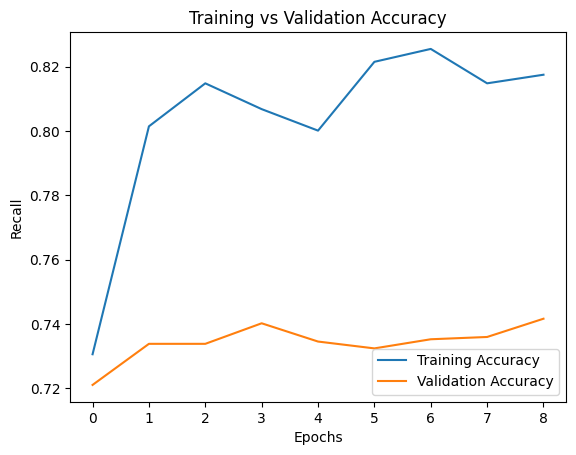

In [ ]:
plt.plot(history.history['Recall'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()